In [1]:
# -*- encoding: utf-8 -*-
""" Application #4 - Comparing two proteins """

import math
import random
import urllib2
from itertools import chain
import matplotlib.pyplot as plt
import _03_Project_4 as student

PAM50_URL = "http://storage.googleapis.com/codeskulptor-alg/alg_PAM50.txt"
HUMAN_EYELESS_URL = "http://storage.googleapis.com/codeskulptor-alg/alg_HumanEyelessProtein.txt"
FRUITFLY_EYELESS_URL = "http://storage.googleapis.com/codeskulptor-alg/alg_FruitflyEyelessProtein.txt"
CONSENSUS_PAX_URL = "http://storage.googleapis.com/codeskulptor-alg/alg_ConsensusPAXDomain.txt"
WORD_LIST_URL = "http://storage.googleapis.com/codeskulptor-assets/assets_scrabble_words3.txt"

In [2]:
# PROVIDED CODE
def read_scoring_matrix(filename):
    """ Read a scoring matrix from the file named filename. Argument: name of file containing a scoring matrix. Returns a dictionary of dictionaries mapping X and Y characters to scores """
    scoring_dict = {}
    scoring_file = urllib2.urlopen(filename)
    ykeys = scoring_file.readline()
    ykeychars = ykeys.split()  # these are all possible characters on top of the matrix (Y values)
    for line in scoring_file.readlines():
        vals = line.split()  # here we pick up the X values line by line
        xkey = vals.pop(0)  # here we remove the first element which is going to be the key for our resulting dictionary
        scoring_dict[xkey] = {}  # here we start the dictionary
        for ykey, val in zip(ykeychars, vals):
            scoring_dict[xkey][ykey] = int(val)  # now for each letter 'xkey' we create a dictionary with its corresponding values
    return scoring_dict  # this will return the scoring matrix of this type: {'A' : {'A': 10, 'C': 4, '-': -4, 'T': 4, 'G': 4}, 'G' : {'A': 4, .. }...}


def read_protein(filename):
    """ Read a protein sequence from the file named filename. Arguments: filename -- name of file containing a protein sequence. Returns a string representing the protein """
    protein_file = urllib2.urlopen(filename)
    protein_seq = protein_file.read()
    protein_seq = protein_seq.rstrip()
    return protein_seq


def read_words(filename):
    """ Load word list from the file named filename. Returns a list of strings. """
    word_file = urllib2.urlopen(filename)  # load assets
    words = word_file.read()  # read in files as string
    word_list = words.split('\n')  # template lines and solution lines list of line string
    print "Loaded a dictionary with", len(word_list), "words"
    return word_list

In [3]:
# I. COMPARING TWO PROTEINS - In following questions, we compute the similarity between the human and fruit fly versions of the eyeless protein and see if we can identify the PAX domain.
def check_sequence(seq_1, seq_2):
    """ Checks two aligned sequences and counts the amount of identical elements """
    counter = 0
    for hum, con in zip(seq_1, seq_2):
        if hum == con:
            counter += 1
    return counter / float(len(seq_1))

human = read_protein(HUMAN_EYELESS_URL)
fly = read_protein(FRUITFLY_EYELESS_URL)
consensus = read_protein(CONSENSUS_PAX_URL)
scoring_matrix = read_scoring_matrix(PAM50_URL)


# QUESTION 1
# First, load the files HumanEyelessProtein and FruitflyEyelessProtein using the provided code. These files contain the amino acid sequences that form the eyeless proteins in the human and fruit fly genomes, respectively.
# Then load the scoring matrix PAM50 for sequences of amino acids. This scoring matrix is defined over the alphabet {A,R,N,D,C,Q,E,G,H,I,L,K,M,F,P,S,T,W,Y,V,B,Z,X,-} which represents all possible amino acids and gaps
# (the "dashes" in the alignment).
# Compute the local alignments of the sequences of HumanEyelessProtein and FruitflyEyelessProtein using the PAM50 scoring matrix and enter the score and local alignments for these two sequences below.
# Be sure to clearly distinguish which alignment is which and include any dashes (’-’) that might appear in the local alignment. This problem will be assessed according to the following two items:
# - Is the score of the local alignment correct? (Hint: The sum of the decimal digits in the score is 20.)
# - Are the two sequences in the local alignments (with dashes included if inserted by the algorithm) clearly distinguished and correct?
def question_1():
    alignment_matrix = student.compute_alignment_matrix(human, fly, scoring_matrix, False)
    local_score, local_human, local_fly = student.compute_local_alignment(human, fly, scoring_matrix, alignment_matrix)
    print "Human and fly score after LOCAL alignment:", local_score
    print "Human and fly sequences after LOCAL alignment:"
    print local_human
    print local_fly

question_1()


Human and fly score after LOCAL alignment: 875
Human and fly sequences after LOCAL alignment:
HSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETGSIRPRAIGGSKPRVATPEVVSKIAQYKRECPSIFAWEIRDRLLSEGVCTNDNIPSVSSINRVLRNLASEK-QQ
HSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETGSIRPRAIGGSKPRVATAEVVSKISQYKRECPSIFAWEIRDRLLQENVCTNDNIPSVSSINRVLRNLAAQKEQQ


In [4]:
# QUESTION 2
# Load the file ConsensusPAXDomain. For each of the two sequences of the local alignment computed in Question 1, do the following:
# - Delete any dashes ’-’ present in the sequence.
# - Compute the global alignment of this dash-less sequence with the ConsensusPAXDomain sequence.
# - Compare corresponding elements of these two globally-aligned sequences (local vs. consensus) and compute the percentage of elements in these two sequences that agree.
# To reiterate, you will compute the global alignments of local human vs. consensus PAX domain as well as local fruitfly vs. consensus PAX domain. Your answer should be two percentages: one for each global alignment.
# Enter each percentage below. Be sure to label each answer clearly and include three significant digits of precision.
def question_2():
    alignment_matrix = student.compute_alignment_matrix(human, fly, scoring_matrix, False)
    local_score, local_human, local_fly = student.compute_local_alignment(human, fly, scoring_matrix, alignment_matrix)

    local_human_stripped = local_human.replace('-', '')
    local_fly_stripped = local_fly.replace('-', '')
    alignment_matrix_h = student.compute_alignment_matrix(local_human_stripped , consensus, scoring_matrix, True)
    alignment_matrix_f = student.compute_alignment_matrix(local_fly_stripped, consensus, scoring_matrix, True)

    global_score_h, global_human, global_cons_h = student.compute_global_alignment(local_human_stripped, consensus, scoring_matrix, alignment_matrix_h)
    global_score_f, global_fly, global_cons_f = student.compute_global_alignment(local_fly_stripped, consensus, scoring_matrix, alignment_matrix_f)
    print "\nHuman and fly against consensus scores after GLOBAL alignment:", global_score_h, global_score_f
    print "Human and fly sequences after GLOBAL alignment:"
    print global_human; print global_cons_h; print global_fly; print global_cons_f
    print "Human/consensus alignment match: ", "{0:.1%}".format(check_sequence(global_human, global_cons_h))
    print "Fly/consensus alignment match: ", "{0:.1%}".format(check_sequence(global_fly, global_cons_f))

question_2()


Human and fly against consensus scores after GLOBAL alignment: 613 586
Human and fly sequences after GLOBAL alignment:
-HSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETGSIRPRAIGGSKPRVATPEVVSKIAQYKRECPSIFAWEIRDRLLSEGVCTNDNIPSVSSINRVLRNLASEKQQ
GHGGVNQLGGVFVNGRPLPDVVRQRIVELAHQGVRPCDISRQLRVSHGCVSKILGRYYETGSIKPGVIGGSKPKVATPKVVEKIAEYKRQNPTMFAWEIRDRLLAERVCDNDTVPSVSSINRIIR--------
-HSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETGSIRPRAIGGSKPRVATAEVVSKISQYKRECPSIFAWEIRDRLLQENVCTNDNIPSVSSINRVLRNLAAQKEQQ
GHGGVNQLGGVFVNGRPLPDVVRQRIVELAHQGVRPCDISRQLRVSHGCVSKILGRYYETGSIKPGVIGGSKPKVATPKVVEKIAEYKRQNPTMFAWEIRDRLLAERVCDNDTVPSVSSINRIIR---------
Human/consensus alignment match:  72.9%
Fly/consensus alignment match:  70.1%


In [5]:
# QUESTION 3
# Examine your answers to Questions 1 and 2. Is it likely that the level of similarity exhibited by the answers could have been due to chance? In particular, if you were comparing two random sequences of
# amino acids of length similar to that of HumanEyelessProtein and FruitflyEyelessProtein, would the level of agreement in these answers be likely? To help you in your analysis, there are 23 amino acids with symbols in
# the string "ACBEDGFIHKMLNQPSRTWVYXZ". Include a short justification for your answer.
def question_3():
    ALPHABET = "ACBEDGFIHKMLNQPSRTWVYXZ"
    ALPHABET_SIZE = 23
    SEQ_LENGTH = 133
    MIN_MATCHES = 97

    # Approach no 1: compute probability of terms MIN_MATCHES or more characters matching out of a sequence of SEQ_LENGTH
    def binomial_term(matches, total_length, alphabet_size):
        """ Compute terms of the binomial expansion with probability equal to one over alphabet size """
        prob = 1.0 / float(alphabet_size)
        non_matches = total_length - matches
        combinations = (math.factorial(total_length) / (math.factorial(matches) * math.factorial(non_matches)))  # this is the famous [m / n] for calculating combinations of size n (number of matches(71% of m) in this case)
        return combinations * (prob ** matches) * (1 - prob) ** (non_matches)

    print sum([binomial_term(possible_matches, SEQ_LENGTH, ALPHABET_SIZE) for possible_matches in range(MIN_MATCHES, SEQ_LENGTH + 1)])

    # Approach no 1a: simplified computation of matching one sequence with 97 letters
    print (1 / float(ALPHABET_SIZE)) ** MIN_MATCHES

    # Approach no 2: Monte-Carlo type of test
    def monte_carlo(samples, treshold):
        total = 0
        for i in range(samples):
            seq1 = ""
            seq2 = ""
            for letter in range(SEQ_LENGTH):
                seq1 += random.choice(ALPHABET)
                seq2 += random.choice(ALPHABET)
            if check_sequence(seq1, seq2) >= treshold:  # this is a simple test
                total += 1
        return total

    print monte_carlo(10**5, 0.71)  # not a single hit on a 10^5 trials - this means that the probability of random match occurance is very small

question_3()

# The sequence similarity is not coincidental. The approximated probability of a random match for 71% of elements from the entire sequence is (1/23)^98 which is 3*10^-134. This is way smaller than the result from Question 2.


6.97324628954e-101
8.17334641624e-133
0


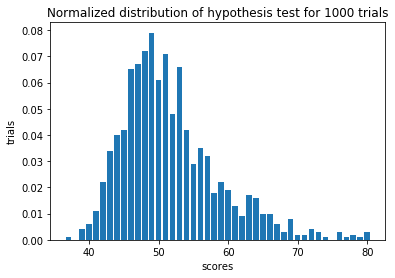

In [6]:
# II. HYPOTHESIS TESTING - In the next two questions, we will consider a more mathematical approach to answering Question 3 that avoids this assumption. In particular, we will take an approach known as statistical
# hypothesis testing to determine whether the local alignments computed in Question 1 are statistically significant (that is, that the probability that they could have arisen by chance is extremely small).

# QUESTION 4
# Write a function generate_null_distribution(seq_x,seq_y,scoring_matrix,num_trials) that takes as input two sequences 'seq_x' and 'seq_y', a scoring_matrix 'scoring_matrix', and a number of trials 'num_trials':
# - Generate a random permutation rand_y of the sequence seq_y using random.shuffle().
# - Compute the maximum value 'score' for the local alignment of seq_x and rand_y using the score matrix scoring_matrix.
# - Increment the entry score in the dictionary 'scoring_distribution' by one.
# Use the function 'generate_null_distribution' to create a distribution with 1000 trials using the protein sequences HumanEyelessProtein and FruitflyEyelessProtein (using the PAM50 scoring matrix).
# Important: Use HumanEyelessProtein as the first parameter (which stays fixed) and FruitflyEyelessProtein as the second parameter seq_y (which is randomly shuffled) when calling 'generate_null_distribution'.
# Next, create a bar plot of the normalized version of this distribution using plt.bar in matplotlib (or your favorite plotting tool). (You will probably find CodeSkulptor too slow to do the required number of trials.)
# The horizontal axis should be the scores and the vertical axis should be the fraction of total trials corresponding to each score. As usual, choose reasonable labels for the axes and title
def generate_null_distribution(seq_x, seq_y, scoring_matrix, num_trials):
    scoring_distribution = {}
    for trial in range(num_trials):
        rand_y = list(seq_y)
        random.shuffle(rand_y)
        alignment_matrix = student.compute_alignment_matrix(seq_x, rand_y, scoring_matrix, False)  # here we mix the real data with a randomly shuffled sequence x
        local_score, local_human, local_fly = student.compute_local_alignment(seq_x, rand_y, scoring_matrix, alignment_matrix)
        if local_score not in scoring_distribution:
            scoring_distribution[local_score] = 1
        else:
            scoring_distribution[local_score] += 1

    return scoring_distribution

def question_4():
    distribution = generate_null_distribution(human, fly, scoring_matrix, 1000)  # this takes too long to compute, so we use a copy below
    x_sorted = sorted(distribution.keys())
    y_sorted = [distribution[x] / float(1000) for x in x_sorted]  # the normalized version is split over the total amount of scores, which is 1000
    plt.title('Normalized distribution of hypothesis test for 1000 trials')
    plt.xlabel('scores')
    plt.ylabel('trials')
    plt.bar(x_sorted, y_sorted)
    plt.show()

question_4()

In [7]:
# QUESTION 5
# Given the distribution computed in Question 4, we can do some very basic statistical analysis of this distribution to help us understand how likely the local alignment score from Question 1 is.
# To this end, we first compute the mean μ and the standard deviation σ of this distribution.
# The z-score helps quantify the likelihood of the score 's' being a product of chance. Small z-scores indicate a greater likelihood that the local alignment score was due to chance while larger scores
# indicate a lower likelihood that the local alignment score was due to chance.
# What are the mean and standard deviation for the distribution that you computed in Question 4?
# What is the z-score for the local alignment for the human eyeless protein vs. the fruitfly eyeless protein based on these values?
def question_5():
    # distribution = generate_null_distribution(human, fly, scoring_matrix, 1000)  # this takes too long to compute, so we use a copy below
    distribution = {39: 4, 40: 5, 41: 15, 42: 24, 43: 28, 44: 39, 45: 52, 46: 70, 47: 71, 48: 65, 49: 74, 50: 77, 51: 67, 52: 63, 53: 59, 54: 32, 55: 41, 56: 35, 57: 29, 58: 20, 59: 21, 60: 22, 61: 12, 62: 12, 63: 11, 64: 5, 65: 7, 66: 6, 67: 4, 68: 11, 69: 5, 70: 3, 71: 3, 72: 1, 74: 1, 75: 2, 77: 1, 78: 1, 80: 2}
    scores = list(chain.from_iterable([x] * distribution[x] for x in distribution))  # this creates an appropriate number of scores acording to the 'distribution' dictionary
    alignment_matrix = student.compute_alignment_matrix(human, fly, scoring_matrix, False)  # the actual local score between human and fly is needed for the z-value
    local_score, local_human, local_fly = student.compute_local_alignment(human, fly, scoring_matrix, alignment_matrix)

    mean = sum(scores) / float(len(scores))
    stdev = math.sqrt(sum((score - mean)**2 for score in scores) / float(len(scores)))
    # Small z-scores indicate a greater likelihood that the local alignment score was due to chance while larger scores indicate a lower likelihood that the local alignment score was due to chance.
    z = local_score - mean  # the nominator itself is very big, which excludes the randomness
    z_value = (local_score - mean) / stdev  # here we divide it by the standard deviation to see how many standard deviations the test result is off by
    print "the mean value is :", mean
    print "the standard deviation is :", stdev
    print "the z-value is :", z_value  # The z-score helps quantify the likelihood of the score 's' being a product of chance.
    print "the match of the random data is off (3 x stdv) by approx. :", int(z / (3 * stdev)), "times"

question_5()

the mean value is : 51.262
the standard deviation is : 6.50856020945
the z-value is : 126.562246256
the match of the random data is off (3 x stdv) by approx. : 42 times


In [8]:
# QUESTION 6
# For bell-shaped distributions such as the normal distribution, the likelihood that an observation will fall within three multiples of the standard deviation for such distributions is very high.
# Based on your answers to Questions 4 and 5, is the score resulting from the local alignment of the HumanEyelessProtein and the FruitflyEyelessProtein due to chance? As a concrete question, which is more likely:
# the similarity between the human eyeless protein and the fruitfly eyeless protein being due to chance or winning the jackpot in an extremely large lottery? Provide a short explanation for your answers.

# The random data match has a normal distribution and can be analyzed as such. The 'z' value in our test shows that the mean score is off by 126 standard deviatons from the true value, where the expected max. is 3 times
# standard deviation. This means that test result is 42 times further than possible. The probability is really small.
# The probability of winning the jackpot is approx 14*10^-6, which is way bigger (more likely) than the one of getting a random sequence match.

In [9]:
# QUESTION 7
# The edit distance for two strings x and y can be expressed in terms of the lengths of the two strings and their corresponding similarity score as follows: ∣x∣+∣y∣−score(x,y)
# where score(x,y) is the score returned by the global alignment of these two strings using a very simple scoring matrix that can be computed using build_scoring_matrix.
# Determine the values for diag_score, off_diag_score, and dash_score such that the score from the resulting global alignment yields the edit distance when substituted into the formula above.
# Be sure to indicate which values corresponds to which parameters
def question_7():
    def calculate_distance(w1, w2):
        scoring_matrix = student.build_scoring_matrix(set(w1) | set(w2), 2, 1, 0)  # the dash score has to be zero, so there is only a case of manipulating diag and off
        alignment_matrix = student.compute_alignment_matrix(w1, w2, scoring_matrix, True)
        score, x, y = student.compute_global_alignment(w1, w2, scoring_matrix, alignment_matrix)
        # print "Lengths:", len(w1) + len(w2), ", Score:", score, ", Words:", x, y
        return len(w1) + len(w2) - score

    print(calculate_distance("a", "a") == 0)  # no action needed
    print(calculate_distance("aa", "aa") == 0)  # no action needed
    print(calculate_distance("aaa", "aba") == 1)  # one Substitution needed
    print(calculate_distance("aaaa", "abba") == 2)  # two Substitutions needed
    print(calculate_distance("aaaa", "aaa") == 1)  # one Insertion or Deletion needed
    print(calculate_distance("aaaa", "aa") == 2)  # two Insertions or Deletions needed

    # Answers:
    # diag_score is: 2  #  If two non-dash characters agree, the scoring matrix scores that match as 2. Note that these two matching characters also increase the size of |x∣+∣y∣ by exactly two, leading to no increase in the edit distance.
    # off_diag_score is: 1
    # dash_score is: 0

question_7()

True
True
True
True
True
True


In [12]:
# QUESTION 8
# In practice, edit distance is a useful tool in applications such as spelling correction and plagiarism detection where determining whether two strings are similar/dissimilar is important.
# For this final question, we will implement a simple spelling correction function that uses edit distance to determine whether a given string is the misspelling of a word.
# To begin, load the list of 79339 words. Then, write a function check_spelling(checked_word, dist, word_list) that iterates through word_list and returns the set of all words that are within edit distance
# 'dist' of the string 'checked_word'. Use your function 'check_spelling' to compute the set of words within an edit distance of one from the string "humble" and the set of words within an edit distance of two from
# the string "firefly". (Note this is not "fruitfly".). Enter these two sets of words in the box below. As quick check, both sets should include eleven words.
def question_8():
    word_list = read_words(WORD_LIST_URL)
    def check_spelling(checked_word, dist, word_list):
        scoring_matrix = student.build_scoring_matrix(set(checked_word) | set(chain.from_iterable(word_list)), 2, 1, 0)
        spelling = []

        for word in word_list:
            alignment_matrix = student.compute_alignment_matrix(checked_word, word, scoring_matrix, True)
            score, dummy_x, dummy_y = student.compute_global_alignment(checked_word, word, scoring_matrix, alignment_matrix)
            distance = len(checked_word) + len(word) - score
            if distance <= dist:
                spelling.append(word)
        return spelling

    print "Found words with distance 1 from 'humble':\n", check_spelling("humble", 1, word_list)
    print "Found words with distance 2 from 'firefly':\n", check_spelling("firefly", 2, word_list)

question_8()

Loaded a dictionary with 79340 words
Found words with distance 1 from 'humble':
['bumble', 'fumble', 'humble', 'humbled', 'humbler', 'humbles', 'humbly', 'jumble', 'mumble', 'rumble', 'tumble']
Found words with distance 2 from 'firefly':
['direly', 'finely', 'fireclay', 'firefly', 'firmly', 'firstly', 'fixedly', 'freely', 'liefly', 'refly', 'tiredly']
